# Flamingos

### Import Libraries

In [59]:
import pandas as pd
import numpy as np

### Set the path to the data file

In [60]:
sdf = pd.read_csv(r'data_raw.csv',sep = ',', header = 0)
sdf['week'] = pd.to_datetime(sdf['week']) # MM-DD-YYYY format
sdf = sdf.set_index('week')
sdf['feat_main_page1'] = sdf.feat_main_page.apply(lambda x: 1 if x == True else 0)
sdf.head()

,sku,weekly_sales,feat_main_page,color,price,vendor,functionality,feat_main_page1
week,,,,,,,,
2016-10-31,1,135,True,black,10.16,6,06.Mobile phone accessories,1
2016-07-11,1,102,True,black,9.86,6,06.Mobile phone accessories,1
2016-11-14,1,110,True,black,10.24,6,06.Mobile phone accessories,1
2016-11-21,1,127,True,black,8.27,6,06.Mobile phone accessories,1
2016-11-28,1,84,True,black,8.83,6,06.Mobile phone accessories,1


In [61]:
sdf1 = sdf.dropna()
sdf1 = sdf1.loc[sdf1['sku'] == 1]
sdf1 = sdf1[['weekly_sales','feat_main_page1', 'price']]
sdf1 = sdf1.groupby(sdf1.index).mean('weekly_sales')
sdf1 = sdf1.sort_index()
sdf1

# Y = sdf1[['weekly_sales']]
# X = sdf1[['feat_main_page1', 'price']]

,weekly_sales,feat_main_page1,price
week,,,
2016-05-12,87.0,1.0,8.98
2016-07-11,102.0,1.0,9.86
2016-10-31,135.0,1.0,10.16
2016-11-14,110.0,1.0,10.24
2016-11-21,127.0,1.0,8.27
...,...,...,...
2018-09-24,19.0,0.0,27.49
2018-10-09,21.0,0.0,25.49
2018-11-06,22.0,0.0,22.85


In [63]:
# I want to use historical data of the previous three weeks as inputs to train the predictive model.
for n in range(1,9):
    sdf1['Sales_'+ str(n) + '_weeks_back'] = sdf1['weekly_sales'].shift(+n)
    sdf1['feat'+ str(n) + '_weeks_back'] = sdf1['feat_main_page1'].shift(+n)
    sdf1['price'+ str(n) + '_weeks_back'] = sdf1['price'].shift(+n)
sdf1

,weekly_sales,feat_main_page1,price,Sales_1_weeks_back,Sales_2_weeks_back,Sales_3_weeks_back,Sales_4_weeks_back,Sales_5_weeks_back,Sales_6_weeks_back,Sales_7_weeks_back,...,feat4_weeks_back,price4_weeks_back,feat5_weeks_back,price5_weeks_back,feat6_weeks_back,price6_weeks_back,feat7_weeks_back,price7_weeks_back,feat8_weeks_back,price8_weeks_back
week,,,,,,,,,,,,,,,,,,,,,
2016-05-12,87.0,1.0,8.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-11,102.0,1.0,9.86,87.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-31,135.0,1.0,10.16,102.0,87.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-11-14,110.0,1.0,10.24,135.0,102.0,87.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-11-21,127.0,1.0,8.27,110.0,135.0,102.0,87.0,NaN,NaN,NaN,...,1.0,8.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-24,19.0,0.0,27.49,32.0,16.0,13.0,16.0,16.0,10.0,13.0,...,0.0,29.56,0.0,30.56,0.0,30.56,0.0,25.49,0.0,31.56
2018-10-09,21.0,0.0,25.49,19.0,32.0,16.0,13.0,16.0,16.0,10.0,...,0.0,25.49,0.0,29.56,0.0,30.56,0.0,30.56,0.0,25.49
2018-11-06,22.0,0.0,22.85,21.0,19.0,32.0,16.0,13.0,16.0,16.0,...,0.0,25.49,0.0,25.49,0.0,29.56,0.0,30.56,0.0,30.56


In [64]:
sdf1 = sdf1.dropna().astype('int64')
sdf1

,weekly_sales,feat_main_page1,price,Sales_1_weeks_back,Sales_2_weeks_back,Sales_3_weeks_back,Sales_4_weeks_back,Sales_5_weeks_back,Sales_6_weeks_back,Sales_7_weeks_back,...,feat4_weeks_back,price4_weeks_back,feat5_weeks_back,price5_weeks_back,feat6_weeks_back,price6_weeks_back,feat7_weeks_back,price7_weeks_back,feat8_weeks_back,price8_weeks_back
week,,,,,,,,,,,,,,,,,,,,,
2016-12-26,23,1,10,128,64,84,127,110,135,102,...,1,8,1,10,1,10,1,9,1,8
2017-01-05,9,0,23,23,128,64,84,127,110,135,...,1,8,1,8,1,10,1,10,1,9
2017-01-16,11,0,23,9,23,128,64,84,127,110,...,1,10,1,8,1,8,1,10,1,10
2017-01-23,19,0,20,11,9,23,128,64,84,127,...,1,9,1,10,1,8,1,8,1,10
2017-01-30,17,0,20,19,11,9,23,128,64,84,...,1,10,1,9,1,10,1,8,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-24,19,0,27,32,16,13,16,16,10,13,...,0,29,0,30,0,30,0,25,0,31
2018-10-09,21,0,25,19,32,16,13,16,16,10,...,0,25,0,29,0,30,0,30,0,25
2018-11-06,22,0,22,21,19,32,16,13,16,16,...,0,25,0,25,0,29,0,30,0,30


In [65]:
sdf1['Sales_1_weeks_back'].size

92

### B. Ready to split the data and train the models

In [49]:
# Import LinearRegression function
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()

In [50]:
# Import Random Forest function
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100,max_features=3,random_state=1)

In [51]:
# Extract Sales from the previous weeks and assign as inputs. The output is the current sales 'sku11_df['Sales']'
final_x = sdf1.iloc[:,1:].to_numpy()
print(final_x)

final_y = sdf1['weekly_sales'].to_numpy()
len(final_y)

[[128  64  84 127 110 135 102  87]
 [ 23 128  64  84 127 110 135 102]
 [  9  23 128  64  84 127 110 135]
 [ 11   9  23 128  64  84 127 110]
 [ 19  11   9  23 128  64  84 127]
 [ 17  19  11   9  23 128  64  84]
 [154  17  19  11   9  23 128  64]
 [ 12 154  17  19  11   9  23 128]
 [ 17  12 154  17  19  11   9  23]
 [ 13  17  12 154  17  19  11   9]
 [  8  13  17  12 154  17  19  11]
 [  6   8  13  17  12 154  17  19]
 [  7   6   8  13  17  12 154  17]
 [  5   7   6   8  13  17  12 154]
 [  6   5   7   6   8  13  17  12]
 [  9   6   5   7   6   8  13  17]
 [  7   9   6   5   7   6   8  13]
 [  7   7   9   6   5   7   6   8]
 [ 13   7   7   9   6   5   7   6]
 [  7  13   7   7   9   6   5   7]
 [  8   7  13   7   7   9   6   5]
 [  5   8   7  13   7   7   9   6]
 [  9   5   8   7  13   7   7   9]
 [  7   9   5   8   7  13   7   7]
 [ 17   7   9   5   8   7  13   7]
 [  8  17   7   9   5   8   7  13]
 [  8   8  17   7   9   5   8   7]
 [  5   8   8  17   7   9   5   8]
 [  8   5   8   8  1

92

In [52]:
# Use the last 45 out of 90 observations for the testing sets. 
X_train,X_test,y_train,y_test=final_x[:-60],final_x[-20:],final_y[:-60],final_y[-20:]

In [53]:
model.fit(X_train,y_train)
lin_model.fit(X_train,y_train)

LinearRegression()

## Random Forest Prediction

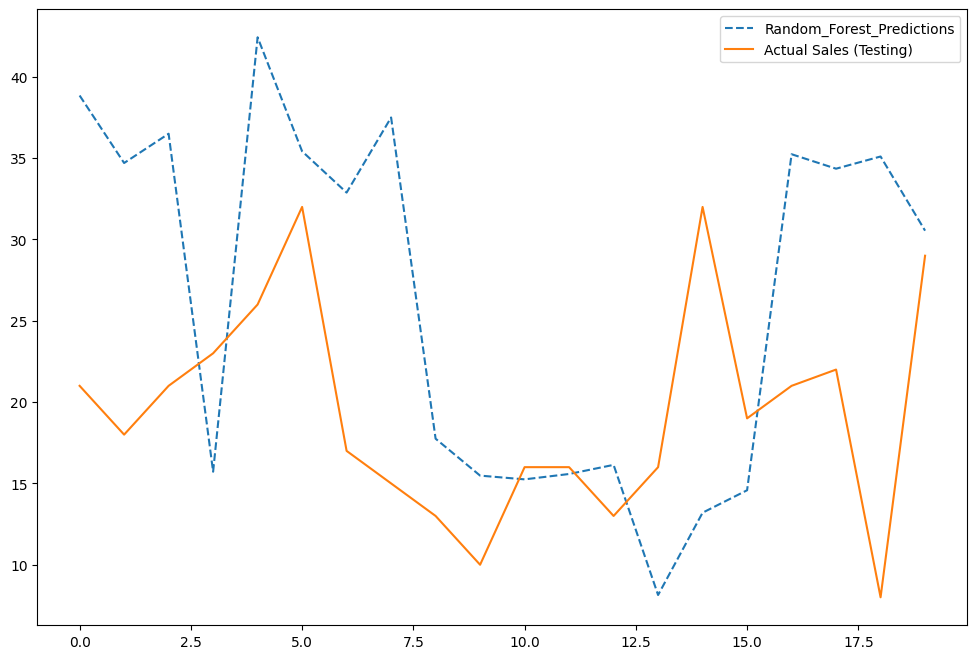

In [54]:
pred=model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred,label='Random_Forest_Predictions', linestyle='--')
plt.plot(y_test,label='Actual Sales (Testing)')
plt.legend(loc="upper right")
plt.show()

## Linear Regression Prediction

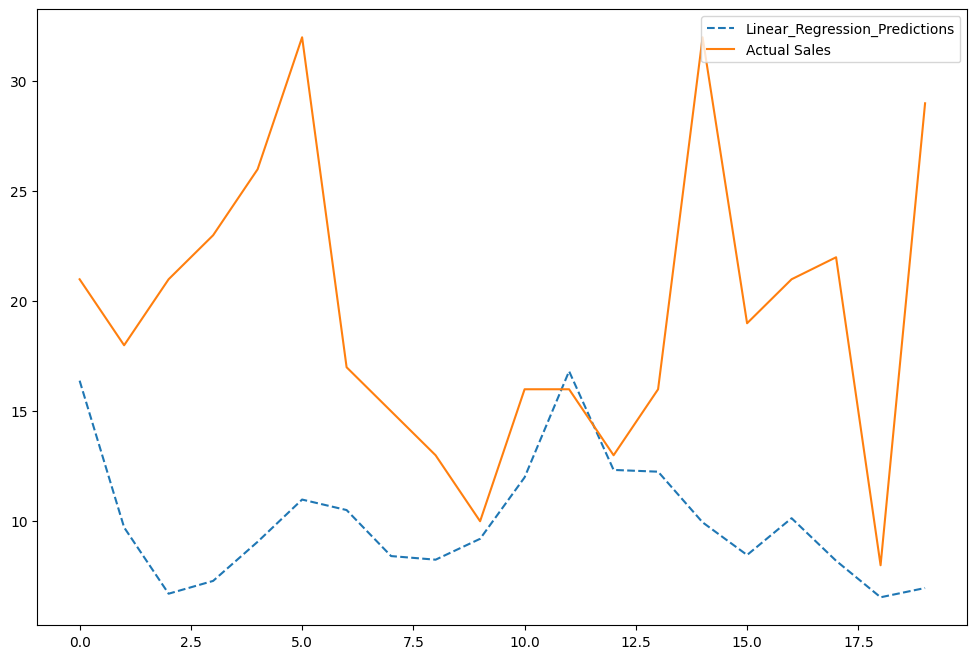

In [55]:
lin_pred=lin_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(lin_pred,label='Linear_Regression_Predictions',linestyle='--')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper right")
plt.show()

In [56]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_rf=sqrt(mean_squared_error(pred,y_test))
rmse_lr=sqrt(mean_squared_error(lin_pred,y_test))

In [41]:
print('Root Mean Squared Error for Random Forest Model is:',rmse_rf)
print('Root Mean Squared Error for Linear Regression Model is:',rmse_lr)

Root Mean Squared Error for Random Forest Model is: 56.16289927523329
Root Mean Squared Error for Linear Regression Model is: 58.02662223825214


#### The lower the RMSE, the better a model fits a dataset. Therefore, I intuitively think that the Linear Regression did a better job than Random Forest 

## Multi-Linear Regression Test

In [17]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()

In [18]:
X.shape, Y.shape

((100, 2), (100, 1))

In [24]:
lin_model.fit(X[:80], Y[:80]) 

LinearRegression()

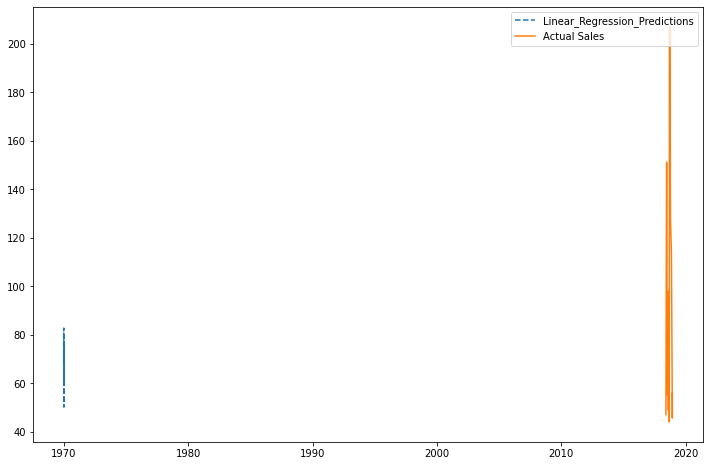

In [25]:
y_test = Y[-20:]
lin_pred=lin_model.predict(X[-20:])
import matplotlib.pyplot as plt
# plt.rcParams["figure.figsize"] = (12,8)
plt.plot(lin_pred,label='Linear_Regression_Predictions',linestyle='--')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper right")
plt.show()

In [67]:
from sklearn import linear_model
import statsmodels.api as sm

x = sdf1[['weekly_sales','feat_main_page1','price']]
y = sdf1.index
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 1.4528870113001708e+18
Coefficients: 
 [1.91927887e+14 1.17162549e+16 2.16458727e+15]


/usr/local/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


UFuncTypeError: ufunc 'subtract' cannot use operands with types dtype('<M8[ns]') and dtype('O')